# '123' Example

In [1]:
import sys; sys.path.insert(0,"../")
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook

import mview

A 10K points version of 123 can be found here:

In [2]:
path = 'data/123/input/'
X_true = np.genfromtxt(path+'spicy_rice_10000_123.csv', delimiter=',')
Y1 = np.genfromtxt(path+'spicy_rice_10000_1.csv', delimiter=',')
Y2 = np.genfromtxt(path+'spicy_rice_10000_2.csv', delimiter=',')
Y3 = np.genfromtxt(path+'spicy_rice_10000_3.csv', delimiter=',')

<IPython.core.display.Javascript object>


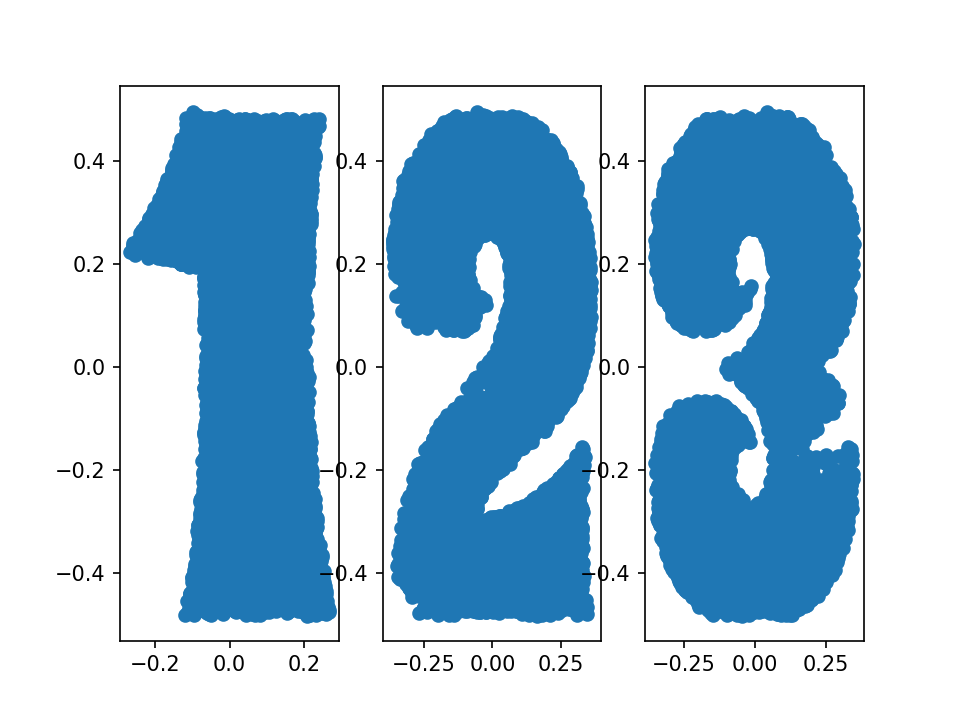

In [3]:
fig, ax = plt.subplots(1,3)
ax[0].plot(Y1[:,0],Y1[:,1],'o')
ax[1].plot(Y2[:,0],Y2[:,1],'o')
ax[2].plot(Y3[:,0],Y3[:,1],'o')

We will run the experiment with 1000 points, so that the nodes are easier to see. The following subset of the data above was especially selected so that the nodes are well separated (making a nicer picture).

<IPython.core.display.Javascript object>


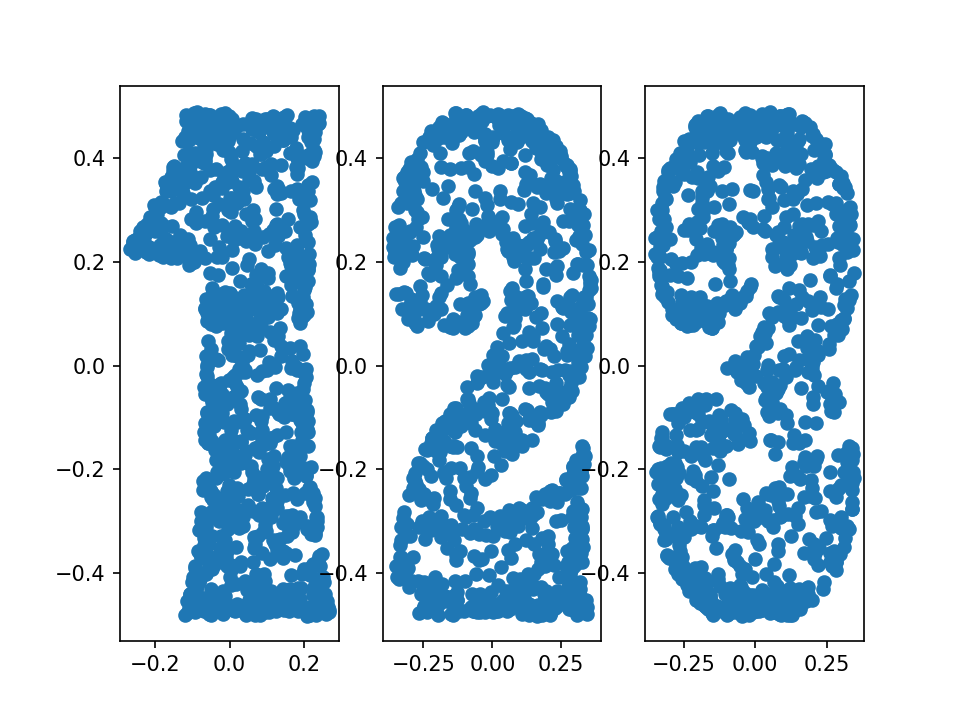

In [4]:
X_true = np.genfromtxt(path+'spicy_rice_1000_123.csv', delimiter=',')
Y1 = np.genfromtxt(path+'spicy_rice_1000_1.csv', delimiter=',')
Y2 = np.genfromtxt(path+'spicy_rice_1000_2.csv', delimiter=',')
Y3 = np.genfromtxt(path+'spicy_rice_1000_3.csv', delimiter=',')
fig, ax = plt.subplots(1,3)
ax[0].plot(Y1[:,0],Y1[:,1],'o')
ax[1].plot(Y2[:,0],Y2[:,1],'o')
ax[2].plot(Y3[:,0],Y3[:,1],'o')

Lets run an experiment from this data, using only a portion of the points, and using the (fixed) true projections ('cylinder' for this example).

For fixed projections, mview.basic finds the global solution very easily (for any average_neighbors).

In [12]:
mv = mview.basic([Y1,Y2,Y3],Q='cylinder',
                 average_neighbors = 2,
                 max_iter=300, min_grad=1e-5,lr=10,min_cost=1e-4,
                 verbose=2)

mpse.MPSE():
multigraph.DISS():
  nodes : 1000
  added attribute:
    type : features
    complete : True
  added attribute:
    type : features
    complete : True
  added attribute:
    type : features
    complete : True
    dissimilarity stats:
      number of views : 3
      number of points : 1000
    embedding stats:
      embedding dimension : 3
      projection dimension : 2
      fixed embedding : False
      fixed perspectives : True
  MPSE.initialize():
    X0 : random
    Q0 : given
  MPSE.gd():
      mpse method : fixed projections
      initial stress : 1.16e+00
    gd.single(): 
      computation parameters:
        stochastic : True
        constraint : False
        scheme : mm
        initial lr : 1
        min_cost : 1.00e-04
        min_grad : 1.00e-05
        max_iter : 300
        max_step : 1.00e+10
      progress:
        iter:      cost:     grad:     lr:       step:
         154/ 300  3.86e-04  1.00e-05  5.44e+00  5.47e-05
      results:
        conclusion : 

<IPython.core.display.Javascript object>


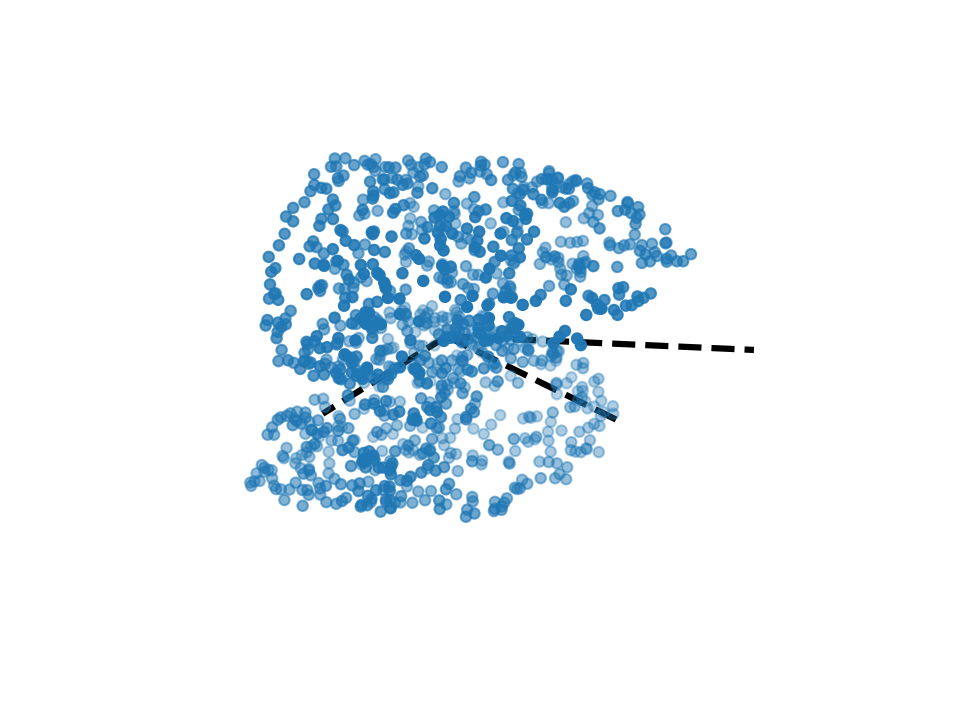

<IPython.core.display.Javascript object>


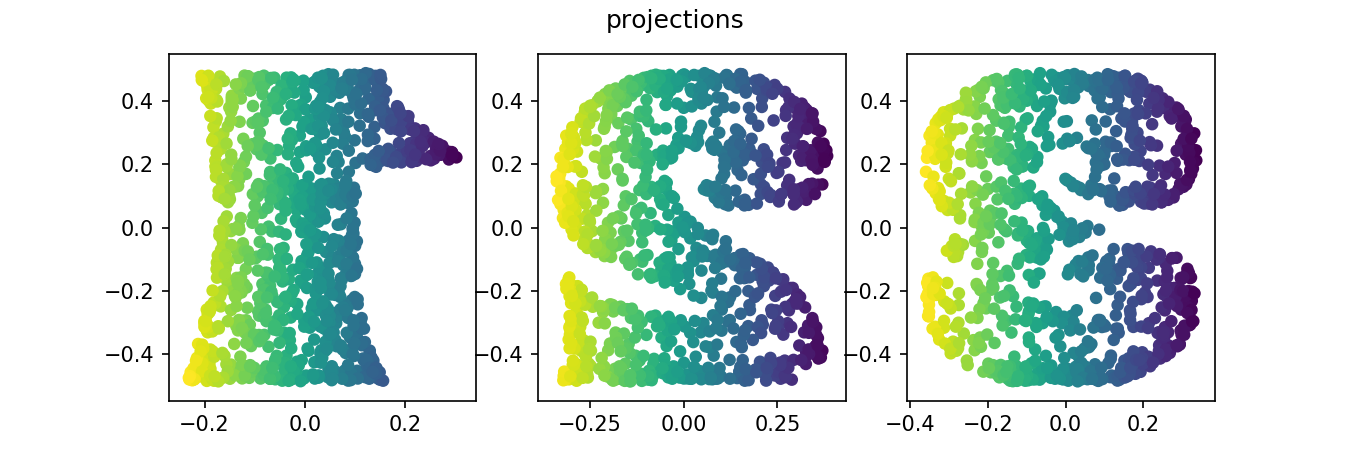

<IPython.core.display.Javascript object>


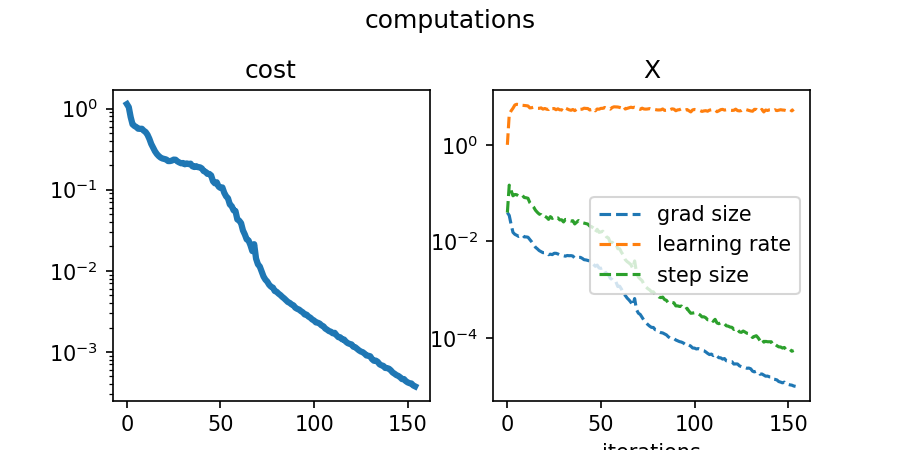

In [13]:
mv.figureX()
mv.figureY()
mv.figureH()

#path = 'data/123/output/'
#np.savetxt(path+'fixed_123.csv',mv.X,delimiter=',')
#np.savetxt(path+'fixed_1.csv',mv.Y[0],delimiter=',')
#np.savetxt(path+'fixed_2.csv',mv.Y[1],delimiter=',')
#np.savetxt(path+'fixed_3.csv',mv.Y[2],delimiter=',')

And on the 3 perspectives:

With varying projections, the algorithm (without smart initialization) fails to find the optimal solution, even for large average_neighbors.

In [14]:
mv = mview.basic([Y1,Y2,Y3],
                 average_neighbors = 2,
                 max_iter=300, min_grad=1e-5,lr=[10,.1],min_cost=1e-4,
                 verbose=2)


mpse.MPSE():
multigraph.DISS():
  nodes : 1000
  added attribute:
    type : features
    complete : True
  added attribute:
    type : features
    complete : True
  added attribute:
    type : features
    complete : True
    dissimilarity stats:
      number of views : 3
      number of points : 1000
    embedding stats:
      embedding dimension : 3
      projection dimension : 2
      fixed embedding : False
      fixed perspectives : False
  MPSE.initialize():
    X0 : random
    Q0 : random
  MPSE.gd():
      mpse method : optimize all
      initial stress : 1.12e+00
    gd.multiple(): 
      computation parameters:
        stochastic : True
        constraint : True
        projected : [False, True]
        scheme : ['mm', 'mm']
        initial lr : 1.00e+00, 1.00e+00
        min_cost : 1.00e-04
        min_grad : 1.00e-05
        max_iter : 300
        max_step : 1.00e+10
      progress:
        iter:      cost:     grad:     lr:       step:
         300/ 300  6.64e-02  1.73e-

<IPython.core.display.Javascript object>


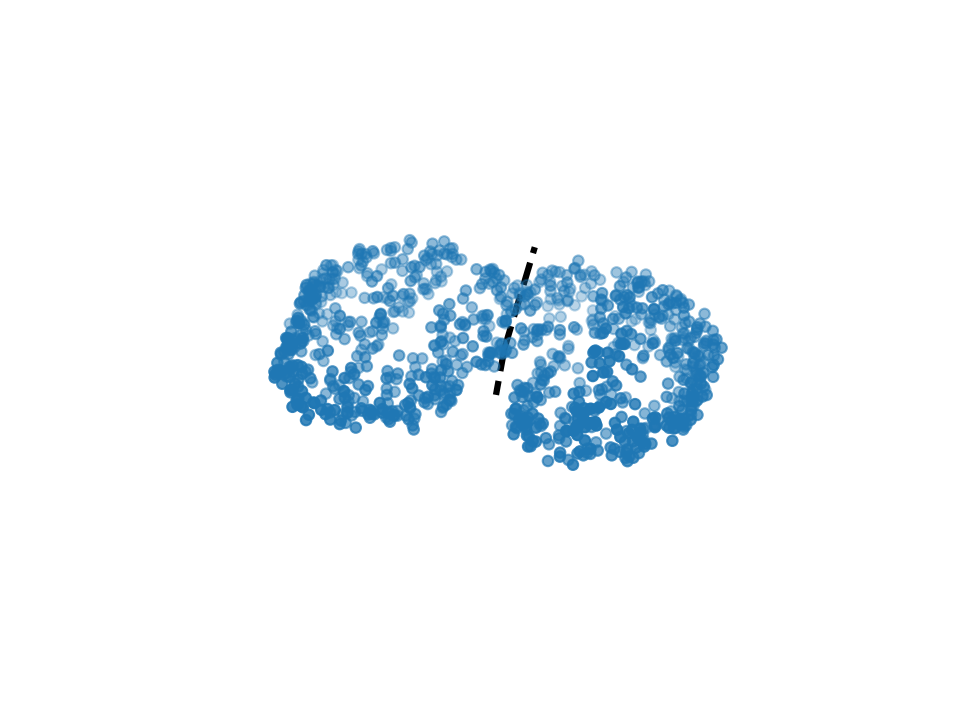

<IPython.core.display.Javascript object>


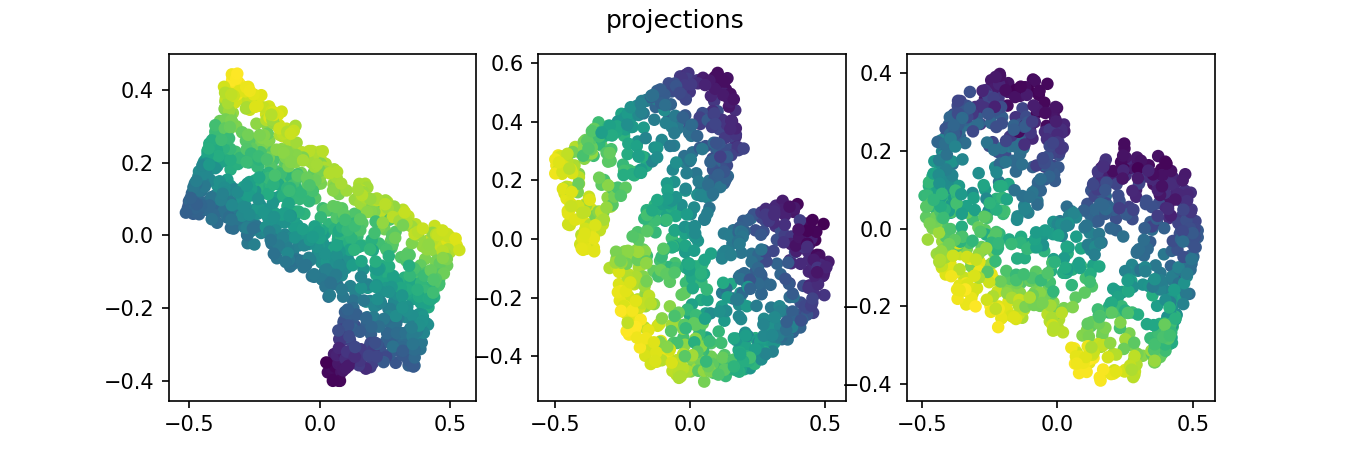

<IPython.core.display.Javascript object>


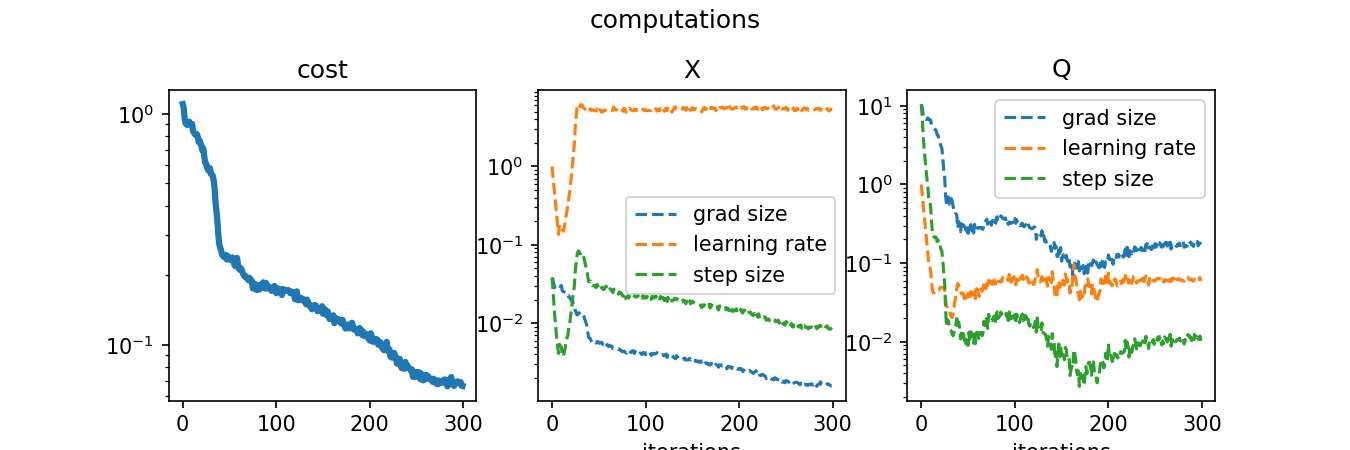

In [15]:
mv.figureX()
mv.figureY()
mv.figureH()

If we add 'smart_initialize', then the algorithm does better (find the global minimum more often). The average_neighbors needs to be higher (I get correct results with 16).

Note: The plots for the history look a little weird. This is because I am combining results from each computation (MDS embedding of combined distances, MPSE search of projections that best fit MDS initialization, then regular coordinate adaptive GD to find solution). I'll update soon to divide the costs from different parts of the algorithm more efficiently (so the two spikes in the middle of the graph don't mean that something is wrong, but rather that we are changing objective function).

In [16]:
mv = mview.basic([Y1,Y2,Y3],
                 smart_initialize=True,
                 average_neighbors = 2,
                 max_iter=500, min_grad=1e-5,lr=[10,0.1],min_cost=1e-4,
                 verbose=2)

mpse.MPSE():
multigraph.DISS():
  nodes : 1000
  added attribute:
    type : features
    complete : True
  added attribute:
    type : features
    complete : True
  added attribute:
    type : features
    complete : True
    dissimilarity stats:
      number of views : 3
      number of points : 1000
    embedding stats:
      embedding dimension : 3
      projection dimension : 2
      fixed embedding : False
      fixed perspectives : False
  MPSE.initialize():
    X0 : random
    Q0 : random
  MPSE.smart_initialize():


TypeError: single() got multiple values for keyword argument 'verbose'

In [ ]:
mv.figureX()
mv.figureY()
mv.figureH()

#path = 'data/123/output/'
#np.savetxt(path+'varying_123.csv',mv.X,delimiter=',')
#np.savetxt(path+'varying_1.csv',mv.Y[0],delimiter=',')
#np.savetxt(path+'varying_2.csv',mv.Y[1],delimiter=',')
#np.savetxt(path+'varying_3.csv',mv.Y[2],delimiter=',')
#np.save(path+'varying_Q',mv.Q)

There is some issues with 'smart_initialize' that I must still resolve, such as dealing correctly with different embedding/projection dimensions and number of perspectives.

Since getting that right seems that will indeed be important, I'll be working on that and update soon.

## Using tsne

Let us now run mpse using fixed projections (cylinder), but minimizing tsne error in each of the images. Note: 

In [5]:
mv = mview.basic([Y1,Y2,Y3],Q='cylinder',
                 max_iter=300, min_grad=1e-5,lr=10,min_cost=1e-4,
                 verbose=2,
                 visualization='tsne')

mpse.MPSE():
    dissimilarity stats:
      number of views : 3
      number of points : 1000
    embedding stats:
      embedding dimension : 3
      projection dimension : 2
      fixed embedding : False
      fixed perspectives : True
  MPSE.initialize():
    X0 : random
    Q0 : given
  MPSE.gd():
      mpse method : fixed projections
      initial stress : 2.92e+00
    gd.single(): 
      computation parameters:
        stochastic : False
        constraint : False
        scheme : mm
        initial lr : 1
        min_cost : 1.00e-04
        min_grad : 1.00e-05
        max_iter : 300
        max_step : 1.00e+10
      progress:
        iter:      cost:     grad:     lr:       step:
         295/ 300  9.40e-01  1.24e-05  6.88e+02  8.53e-03
      results:
        conclusion : minimum gradient size reached
        total iterations : 296
        final cost : 9.40e-01
        final gradient size : 9.87e-06
        final learning rate : nan
        final step size : nan
        time : 2

In [6]:
mv.figureX()
mv.figureY()
mv.figureH()

AttributeError: 'MPSE' object has no attribute 'DD'